# Black Friday Exploratory Data Analysis

Within this notebook, there are several graphs that are used to analyze the Black Friday dataset. The dataset contains 550,068 observations and 10 variables. The variables are as follows:
- User_ID: User ID
- Product_ID: Product ID
- Gender: M = male, F = female
- Age: Age of the user (0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+)
- Occupation: Occupation
- City_Category: Category of the city
- Stay_In_Current_City_Years: Number of years the user has stayed in the current city
- Marital_Status: 0 = Single, 1= Married
- Product_Category: Product category ID 
- Purchase: Purchase amount in dollars

There are totally 5891 unique users and 3631 unique products in the dataset. The dataset is quite large and contains a lot of information. The goal of this notebook is to analyze the data and provide insights into the data.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
walmart_data = pd.read_csv("walmart_data.csv")

# Categorical values in data
walmart_data['Gender'].value_counts()
walmart_data['Age'].value_counts()
walmart_data['Occupation'].value_counts()
walmart_data['City_Category'].value_counts()
walmart_data['Stay_In_Current_City_Years'].value_counts()
walmart_data['Marital_Status'].value_counts()
walmart_data['Product_Category'].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

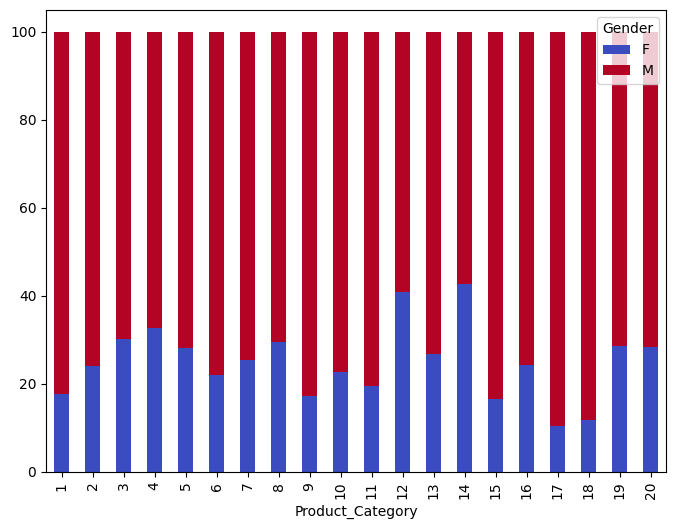

In [24]:
# proportion of purchase spending on each product category by gender
total_purchase_by_gender = walmart_data.groupby(["Gender", "Product_Category"])["Purchase"].sum().reset_index()
pivot_df = total_purchase_by_gender.pivot(index="Product_Category", columns = "Gender", values = "Purchase")
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
percentage_df.plot(kind="bar", stacked = True, figsize=(8,6), colormap = "coolwarm")
category_dist_plot.set_title('Proportion of Purchase Spending on Each Product Category by Gender')
plt.show()

Text(0.5, 1.0, 'Distribution of Purchases by Product Category')

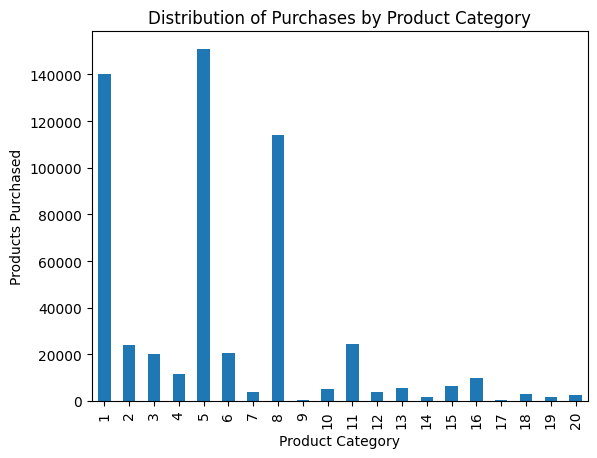

In [25]:
# Distribution of Purchases by Product Category 

len(walmart_data['Product_ID'].unique())
tot_categories = len(walmart_data['Product_Category'].unique())
min_category = min(walmart_data['Product_Category'].unique())
max_category = max(walmart_data['Product_Category'].unique())

category_dist_plot = walmart_data['Product_Category'].value_counts().sort_index().plot(kind='bar')
category_dist_plot.set_xlabel('Product Category')
category_dist_plot.set_ylabel('Products Purchased')
category_dist_plot.set_title('Distribution of Purchases by Product Category')

Text(0.5, 1.0, 'Distribution of Purchases by Gender')

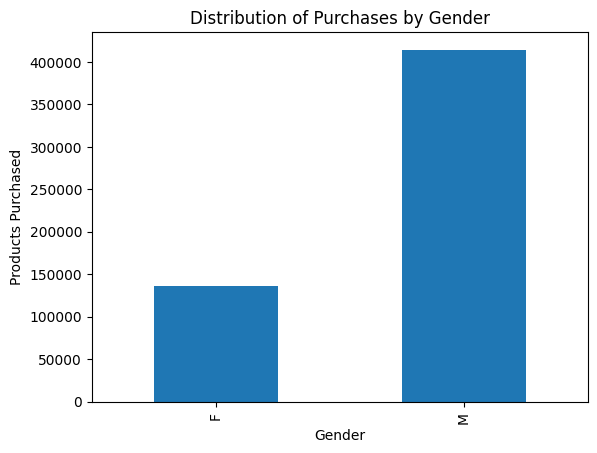

In [26]:
# Distribution of Purchases by Gender

gender_count = walmart_data['Gender'].value_counts().sort_index().plot(kind='bar')
gender_count.set_xlabel('Gender')
gender_count.set_ylabel('Products Purchased')
gender_count.set_title('Distribution of Purchases by Gender')

Text(0.5, 1.0, 'Distribution of Purchases by Age')

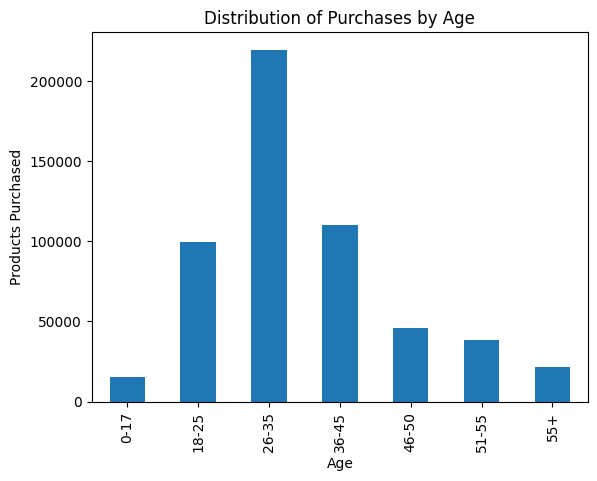

In [27]:
# Distribution of Purchases by Age

age_count = walmart_data['Age'].value_counts().sort_index().plot(kind='bar')
sum(walmart_data.drop_duplicates(subset=['User_ID'])['Age'].value_counts())
age_count.set_xlabel('Age')
age_count.set_ylabel('Products Purchased')
age_count.set_title('Distribution of Purchases by Age')

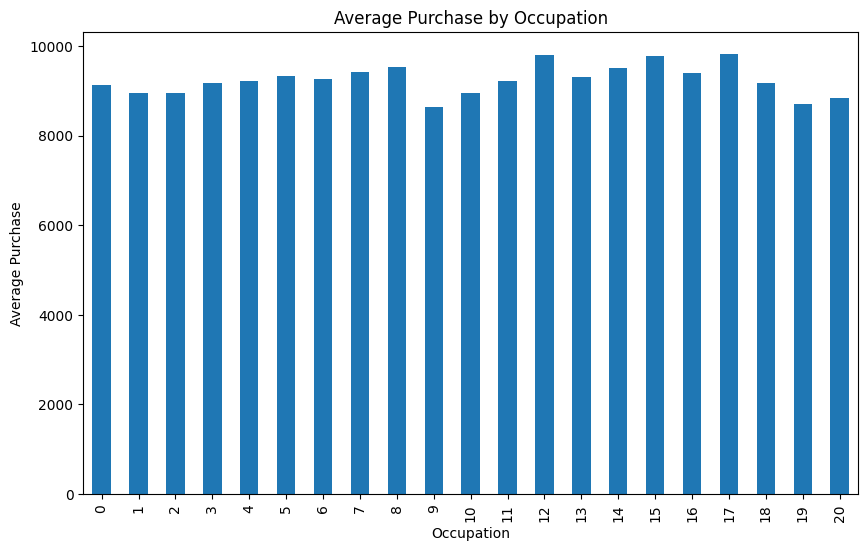

In [29]:
# Average Purchase by Occupation

avg_purchase_by_occupation = walmart_data.groupby('Occupation')['Purchase'].mean()
ax = avg_purchase_by_occupation.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel("Occupation")
ax.set_ylabel("Average Purchase")
ax.set_title("Average Purchase by Occupation")
plt.show()

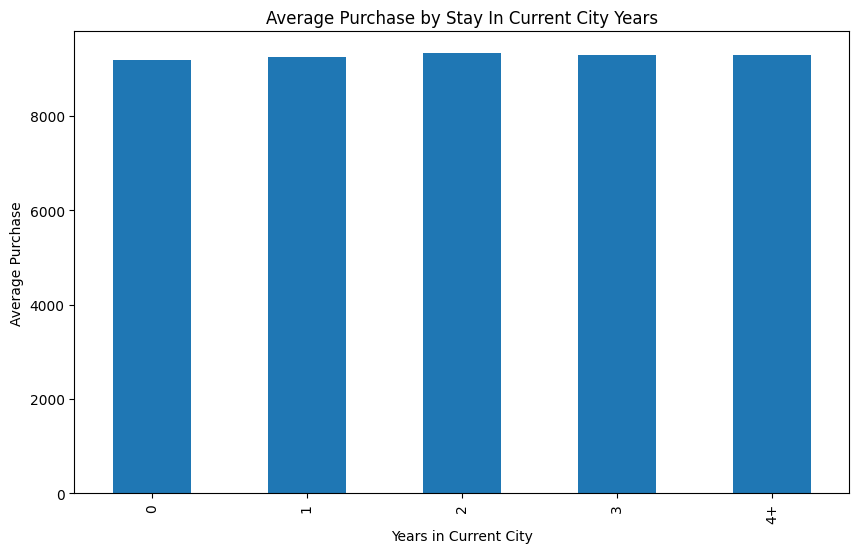

In [31]:
# Average Purchase by Stay in Current City Years

avg_purchase_by_stay = walmart_data.groupby('Stay_In_Current_City_Years')['Purchase'].mean().sort_index()
ax = avg_purchase_by_stay.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel("Years in Current City")
ax.set_ylabel("Average Purchase")
ax.set_title("Average Purchase by Stay In Current City Years")
plt.show()

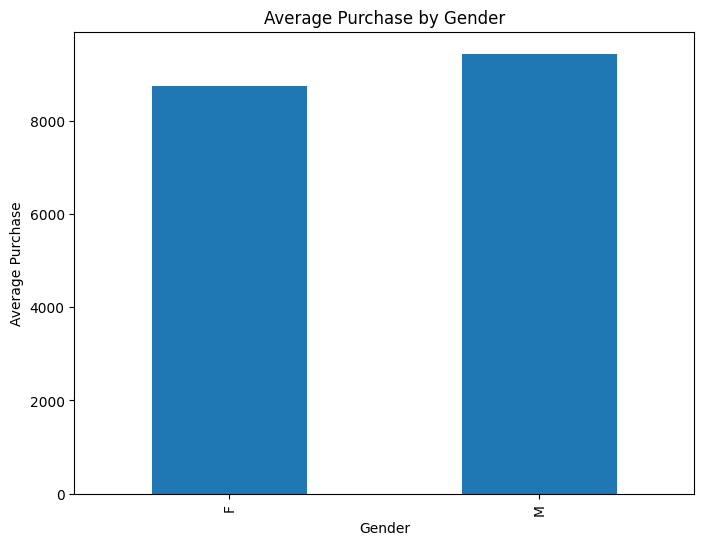

In [33]:
# Average Purchase by Gender

avg_purchase_by_gender = walmart_data.groupby('Gender')['Purchase'].mean().sort_index()
ax = avg_purchase_by_gender.plot(kind='bar', figsize=(8, 6))
ax.set_xlabel("Gender")
ax.set_ylabel("Average Purchase")
ax.set_title("Average Purchase by Gender")
plt.show()

Each of these plots provides valuable insights into the data. We use a proportion plot rather than a count plot to normalize the data and make it easier to compare the different categories. This is because we previously found that there were more instances of certain categories than others, which would make it difficult to compare the categories directly.